In [32]:
# setting up necessary libraries 
# Install dependencies (run once)
!pip install --quiet pandas numpy scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# To upgrade
!pip install --upgrade scikit-learn 
!pip install --upgrade pip


In [34]:
# defining dataframe 
df = pd.read_csv('Data/heart_disease_uci.csv')

# customizing/eliminating rows where target 'chol' is missing
df = df.dropna(subset=['chol'])

# Arranging/organizing features and target
X = df.drop(columns=['chol', 'num'])
y = df['chol']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [35]:
# Imputing missing feature values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardizing features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_imputed)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [36]:
# Hyperparameter grid
alpha_values = np.linspace(0.01, 1.0, 10)
l1_ratios = np.linspace(0.1, 1.0, 10)

results = []

for alpha in alpha_values:
    for l1 in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        results.append({'alpha': alpha, 'l1_ratio': l1, 'R2': r2, 'RMSE': rmse})


/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+06, tolerance: 8.662e+02
  model = cd_fast.enet_coordinate_descent(
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.746e+05, tolerance: 8.662e+02
  model = cd_fast.enet_coordinate_descent(
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

In [37]:
# Checking feature correlations

import pandas as pd
correlations = pd.DataFrame(X).corrwith(pd.Series(y))
print(correlations.abs().sort_values(ascending=False).head(10))


dataset_Switzerland         0.720231
dataset_Hungary             0.310879
thalch                      0.236121
sex_Male                    0.197281
cp_atypical angina          0.149084
restecg_st-t abnormality    0.135697
thal_normal                 0.110957
dataset_VA Long Beach       0.096880
trestbps                    0.092853
fbs_True                    0.091077
dtype: float64


In [38]:
# extra: cheking target values range
print("Min value:", y.min())
print("Max value:", y.max())
print("Range:", y.max() - y.min())
print("Mean:", y.mean())
print("Standard deviation:", y.std())


Min value: 0.0
Max value: 603.0
Range: 603.0
Mean: 199.13033707865168
Standard deviation: 110.7808103532305


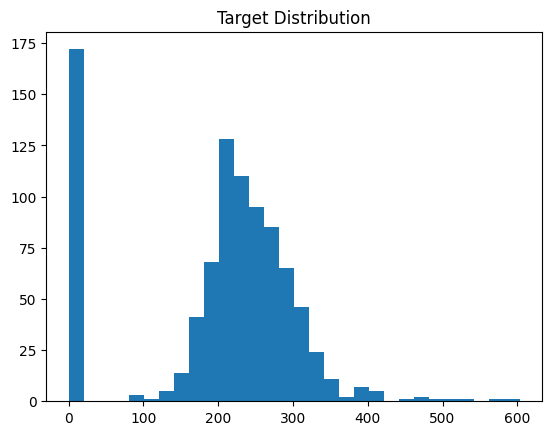

In [39]:
# Checking the target variable distribution

import matplotlib.pyplot as plt
plt.hist(y, bins=30)
plt.title('Target Distribution')
plt.show()


In [40]:
# to confirm best parameters and CV R2 value

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [20, 50, 100],
    'l2_regularization': [0, 0.1, 1]
}

hgb = HistGradientBoostingRegressor(random_state=42)
search = RandomizedSearchCV(hgb, param_dist, cv=5, scoring='r2', n_iter=20, random_state=42)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
print("Best CV R²:", search.best_score_)


Best params: {'min_samples_leaf': 20, 'max_leaf_nodes': 15, 'max_iter': 300, 'max_depth': 10, 'learning_rate': 0.01, 'l2_regularization': 1}
Best CV R²: 0.5741359151718624


# As per CV R2 value (0.5741359151718624): this model can explain around 57% of the variance on unexplored data.

In [41]:
# step to define lin_reg
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()


In [ ]:
# for feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)


In [43]:
# for ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


pipeline = make_pipeline(StandardScaler(), Ridge())
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200, 500]}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print(f"Best alpha: {grid.best_params_['ridge__alpha']}")
print(f"Best CV R²: {grid.best_score_:.3f}")

# Evaluate on test set
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print("🔹 Ridge Regression Results 🔹")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")


Best alpha: 500
Best CV R²: 0.556
🔹 Ridge Regression Results 🔹
R² Score: 0.597
RMSE: 71.30


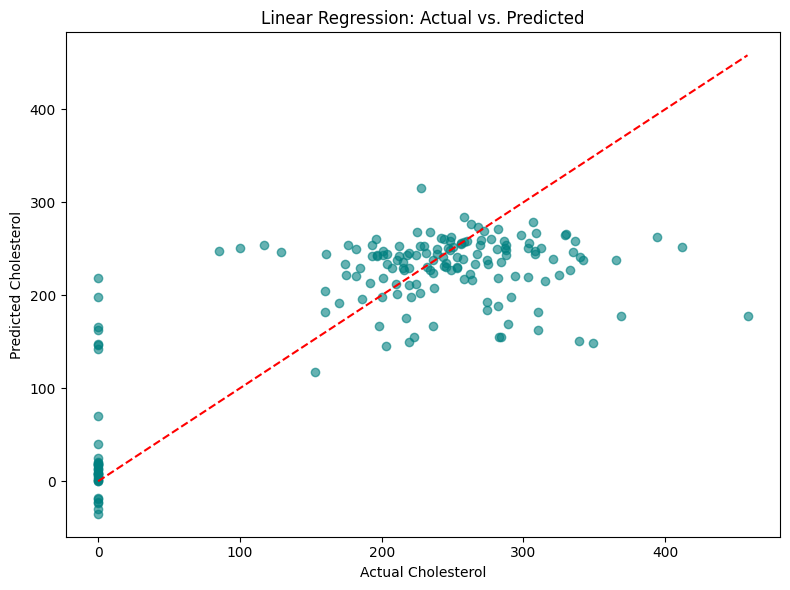

In [ ]:
# for visualization

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Cholesterol")
plt.ylabel("Predicted Cholesterol")
plt.title("Linear Regression: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.tight_layout()
plt.show()


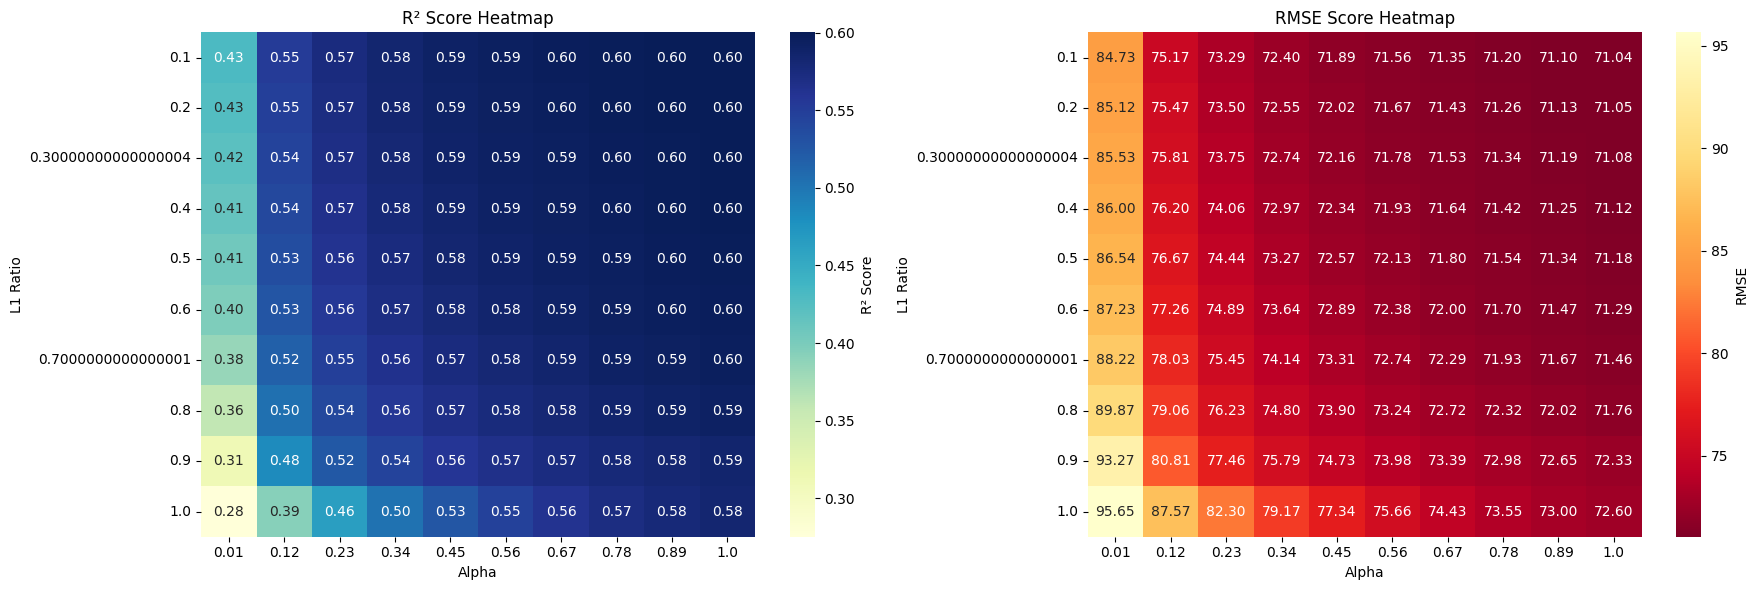

In [45]:
# Heatmaps
results_df = pd.DataFrame(results)
r2_pivot = results_df.pivot(index='l1_ratio', columns='alpha', values='R2')
rmse_pivot = results_df.pivot(index='l1_ratio', columns='alpha', values='RMSE')

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(r2_pivot, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax[0], cbar_kws={'label': 'R² Score'})
ax[0].set_title("R² Score Heatmap")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("L1 Ratio")

sns.heatmap(rmse_pivot, annot=True, fmt=".2f", cmap="YlOrRd_r", ax=ax[1], cbar_kws={'label': 'RMSE'})
ax[1].set_title("RMSE Score Heatmap")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("L1 Ratio")

plt.tight_layout()
plt.show()


In [46]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc

solvers = ['liblinear', 'saga']
penalties = ['l1', 'l2']
best_lr = None
best_f1 = 0

for solver in solvers:
    for penalty in penalties:
        try:
            clf = LogisticRegression(penalty=penalty, solver=solver, max_iter=1000)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            f1 = f1_score(y_test, y_pred)
            if f1 > best_f1:
                best_f1 = f1
                best_lr = clf
        except:
            continue  # some combos like (l1, saga) might fail


/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:128

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn_scores = {}
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # ✅ fixed line
    knn_scores[k] = f1

best_k = max(knn_scores, key=knn_scores.get)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)


/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
/workspaces/BINF-5507-Assignment-2/myenv/lib/python3.12/site-packages/sklearn/utils/multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
/workspaces/BI

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


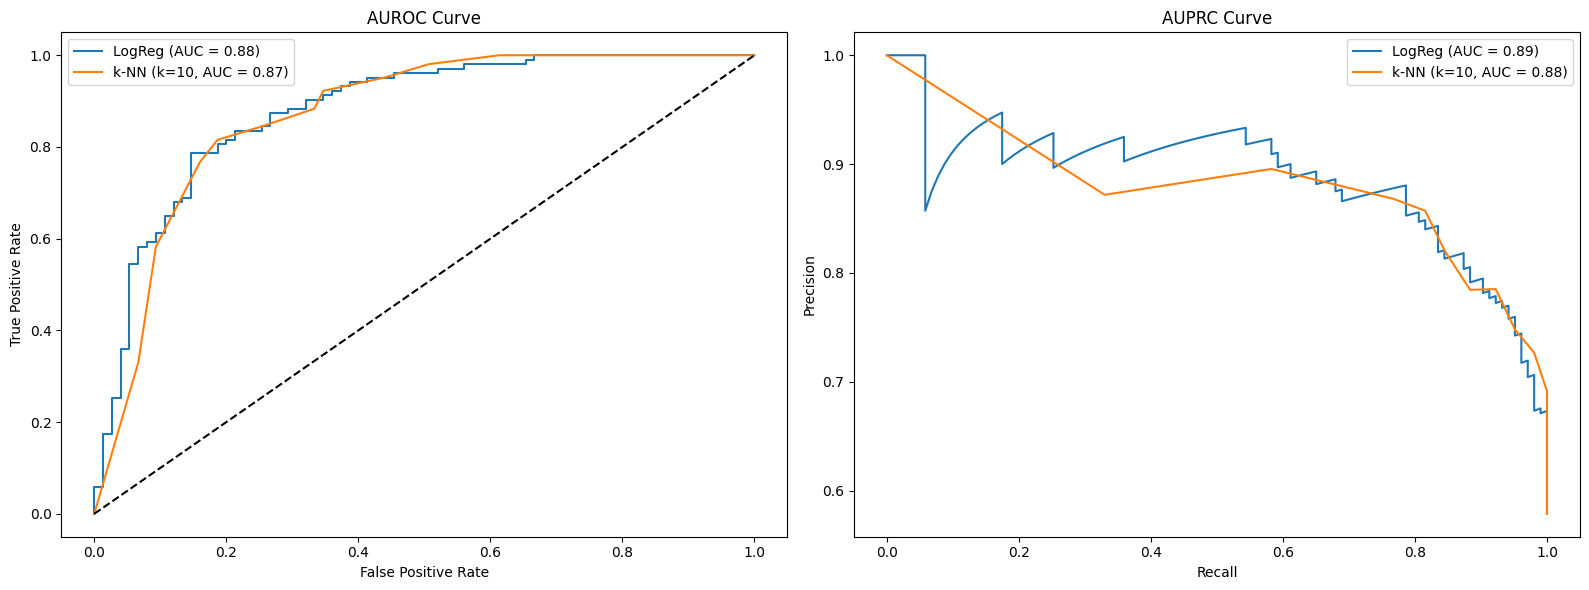

In [ ]:
# AUROC to evaluate classification models
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    f1_score,
    roc_curve,
    precision_recall_curve,
    auc
)
import matplotlib.pyplot as plt

# 📁 Load dataset
df = pd.read_csv('Data/heart_disease_uci.csv')

# 🧹 Drop rows where 'chol' or 'num' is missing (target or label-related columns)
df = df.dropna(subset=['chol', 'num'])

# 🎯 Define features and target
X = df.drop(columns=['chol', 'num'])
y = (df['num'] > 0).astype(int)
# Assuming 'num' is the classification target (heart disease presence)

# 🧼 Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 🧼 Impute missing values in features with column means
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 🔧 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Logistic Regression
best_lr = LogisticRegression(max_iter=1000)
best_lr.fit(X_train_scaled, y_train)
y_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# 📌 KNN with F1-score selection
knn_scores = {}
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred, average='weighted')
    knn_scores[k] = f1

best_k = max(knn_scores, key=knn_scores.get)
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# 📊 ROC and PR Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_proba_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
prec_knn, rec_knn, _ = precision_recall_curve(y_test, y_proba_knn)

# 🖼️ Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# AUROC
ax[0].plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {auc(fpr_lr, tpr_lr):.2f})")
ax[0].plot(fpr_knn, tpr_knn, label=f"k-NN (k={best_k}, AUC = {auc(fpr_knn, tpr_knn):.2f})")
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_title("AUROC Curve")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend()

# AUPRC
ax[1].plot(rec_lr, prec_lr, label=f"LogReg (AUC = {auc(rec_lr, prec_lr):.2f})")
ax[1].plot(rec_knn, prec_knn, label=f"k-NN (k={best_k}, AUC = {auc(rec_knn, prec_knn):.2f})")
ax[1].set_title("AUPRC Curve")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].legend()

plt.tight_layout()
plt.show()
